## Project: Machine Learning Classification
## Dataset: Breast Cancer (from sklearn)

##### Step 1: Import Libraries 
##### In this step, we will import all the necessary libraries for the project.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#####  Step 2: Load Dataset 
##### Load the Breast Cancer dataset from sklearn and convert it into a pandas DataFrame.

In [27]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

##### Step 3: Explore Dataset ( Explore the dataset structure.)
##### - Show first 5 rows


In [28]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### - Display shape and dtypes


In [29]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(569, 31)

##### - Check for missing values

In [30]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### Step 4: Check Class Balance 
##### - Check distribution of the target classes. (Use count chart to visualize.)

In [31]:
target = data.target

# Use value_counts() on the 'target' column to check the class distribution

# here your code  👇🏻
print(df['target'].value_counts())



target
1    357
0    212
Name: count, dtype: int64


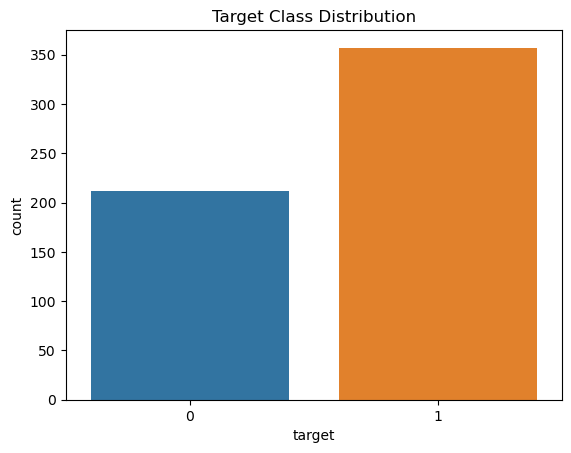

In [32]:
# Plot the class distribution using seaborn countplot

sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")

# Show the plot
plt.show()

##### Step 5: Split Data 
##### - Split dataset into training and testing sets (70/30 split).

In [33]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Step 6: Preprocessing 
##### - Apply feature scaling using StandardScaler.

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit the scaler on X_train and transform it
X_test = scaler.transform(X_test)         # Use the same scaler to transform X_test

##### Step 7: Train Baseline Models 
##### Train three baseline classifiers: DecisionTree, RandomForest, and SVM.

In [35]:
# Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)      # Initialize DecisionTreeClassifier with random_state=42

# Fit the model
clf_tree.fit(X_train, y_train)                          # Fit the model on the training data                                   # Fit the model on the training data (X_train, y_train)

# Predict the model
y_pred_tree = clf_tree.predict(X_test)                  # Predict on X_test                                  # Use the trained model to predict on X_test


In [36]:
# Print Decision Tree results
print("Decision Tree Results:")

# Print accuracy score (use y_test and the predictions from Decision Tree)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

# Print detailed classification report (use y_test and the predictions from Decision Tree)
print(classification_report(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [37]:
# Random Forest
clf_rf = RandomForestClassifier(random_state=42)        # Initialize RandomForestClassifier with random_state=42


# Fit the model
clf_rf.fit(X_train, y_train)                                # Fit the model on the training data (X_train, y_train)                                          # Fit the model on the training data (X_train, y_train)


# Predict the model
y_pred_rf = clf_rf.predict(X_test)                                            # Predict on X_test

In [38]:
# Print Random Forest results
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf)) # Use y_test and predictions
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [39]:
# SVM
clf_svm = SVC()                             # Initialize SVC


# Fit the model
clf_svm.fit(X_train, y_train)                                        # Fit the model on the training data (X_train, y_train)


# Predict the model
y_pred_svm = clf_svm.predict(X_test)                                      # Predict on X_test

In [ ]:

# Print SVM results
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))                     # Use y_test and predictions
print(classification_report(y_test, y_pred_svm))                      # Use y_test and predictions

SVM Results:
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##### Step 8: Hyperparameter Tuning 
##### Use GridSearchCV to tune hyperparameters of one model (SVM).


In [41]:
param_grid = {
'C': [0.1, 1, 10],
'kernel': ['linear', 'rbf']
}

svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)


# Fit the grid search
grid.fit(X_train, y_train)                                      # Fit on training data (X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [42]:
# Print best parameters and best score
print("Best Params:", grid.best_params_)                         # grid.best_params_
print("Best CV Score:", grid.best_score_)                         # grid.best_score_

Best Params: {'C': 1, 'kernel': 'rbf'}
Best CV Score: 0.9758241758241759


##### Step 9: Final Evaluation 
##### Evaluate the best model from GridSearch on the test set.



In [43]:

# Print final tuned model results
print("Final Tuned SVM Results:")
y_pred_best = grid.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Final Tuned SVM Results:
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [44]:
# Save the model
import joblib
joblib.dump(clf_svm, "svm_model.pkl")
print("Model saved as svm_model.pkl")


Model saved as svm_model.pkl


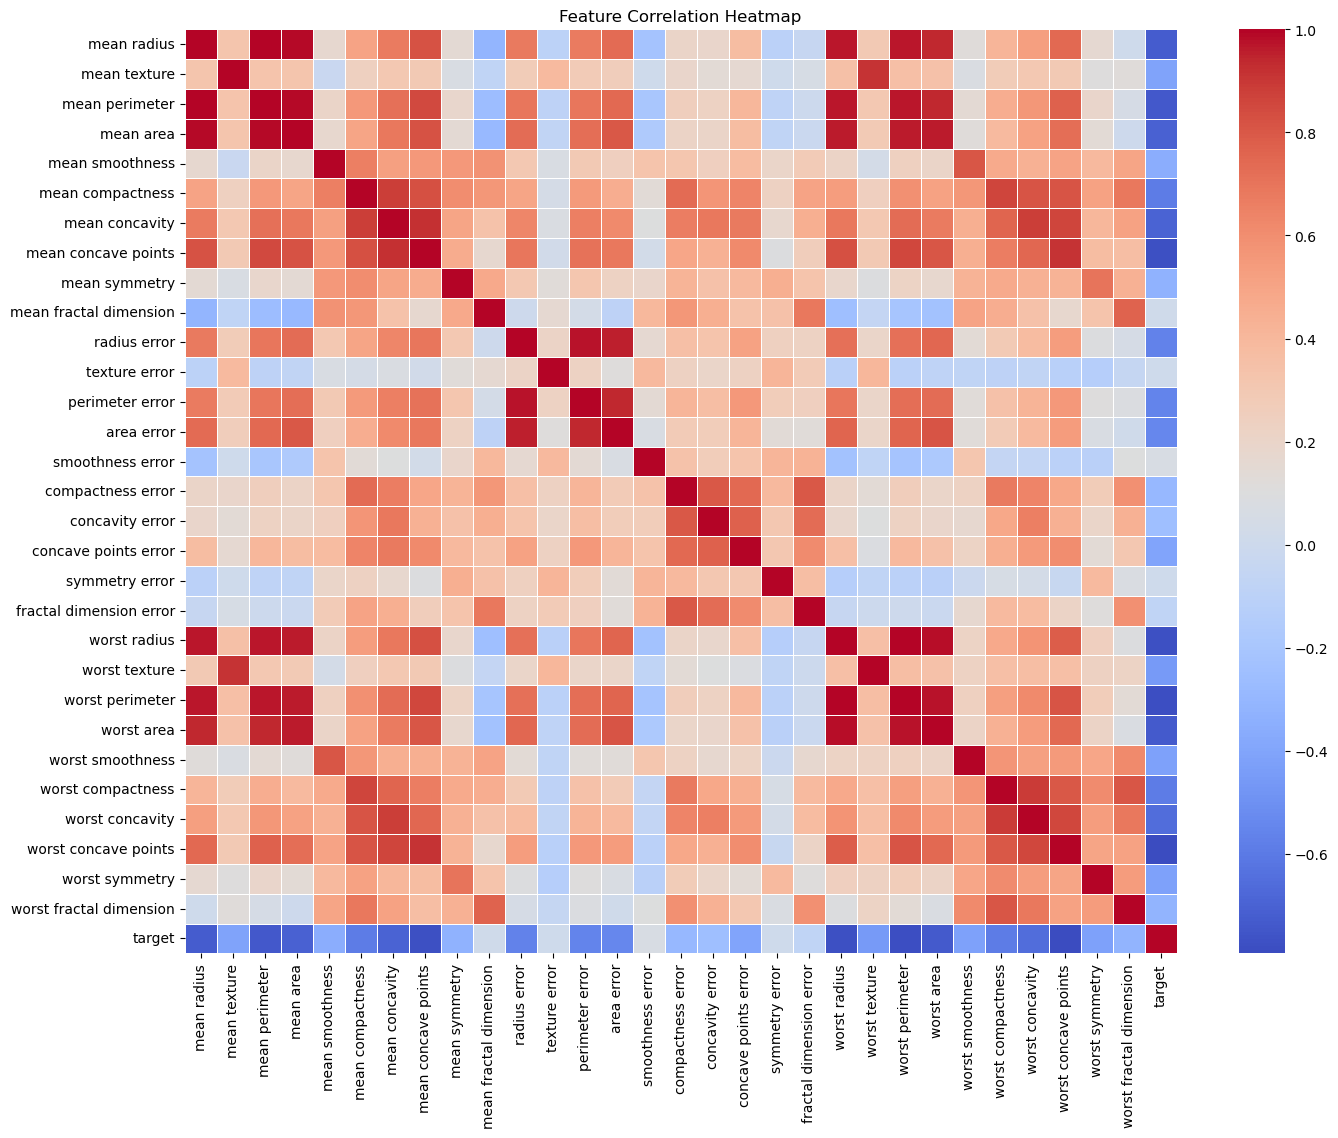

In [45]:
# Correlation heatmap for the dataset
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

# Now split the reduced data
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Continue with scaling and modeling using X_train_new and X_test_new

Selected features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [47]:
# SVM
clf_svm = SVC()                             # Initialize SVC


# Fit the model
clf_svm.fit(X_train, y_train)                                        # Fit the model on the training data (X_train, y_train)


# Predict the model
y_pred_svm = clf_svm.predict(X_test)                                      # Predict on X_test
# Print SVM results
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))                     # Use y_test and predictions
print(classification_report(y_test, y_pred_svm))                      # Use y_test and predictions

SVM Results:
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [49]:
# Save the model
import joblib
joblib.dump(clf_svm, "svm_model.pkl2")
print("Model saved as svm_model.pkl2")

Model saved as svm_model.pkl2
